In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## 캐글 코리아 2차 대회 데이터 셋 데이터
https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/data  
ID : 집을 구분하는 번호  
date : 집을 구매한 날짜  
price : 집의 가격(Target variable)  
bedrooms : 침실의 수  
bathrooms : 화장실의 수  
sqft_living : 주거 공간의 평방 피트(면적)  
sqft_lot : 부지의 평방 피트(면적)  
floors : 집의 층 수  
waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)  
view : 집이 얼마나 좋아 보이는지의 정도  
condition : 집의 전반적인 상태  
grade : King County grading 시스템 기준으로 매긴 집의 등급  
sqft_above : 지하실을 제외한 평방 피트(면적)  
sqft_basement : 지하실의 평방 피트(면적)  
yr_built : 지어진 년도  
yr_renovated : 집을 재건축한 년도  
zipcode : 우편번호  
lat : 위도  
long : 경도  
sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  
sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  

In [3]:
import pandas as pd

train = pd.read_csv("data/house/house_train.csv")
test = pd.read_csv("data/house/house_test.csv")

In [4]:
train.shape, test.shape

((15035, 21), (6555, 20))

In [5]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

예측하고자 하는 값(target)이 price

In [6]:
X_all = train.drop(['price'], axis=1)  # dataframe이니까 [ ]
y = train['price']

print(type(X_all), type(y), X_all.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> (15035, 20) (15035,)


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sel = ['sqft_living', 'sqft_lot', 'bedrooms']  # 'bedrooms' , 'bathrooms', 
X = X_all[sel]
y = train['price']
nor_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
print("정규화 : ", nor_X.shape, y.shape)

정규화 :  (15035, 3) (15035,)


In [13]:
#정규화 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, 
                                                    random_state=42)
# 정규화 데이터 사용 안함.
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    random_state=42)

In [14]:
model = RandomForestRegressor(n_estimators=5, random_state=2)

In [15]:
print( model.fit(X_train, y_train) )
print( model.score(X_train, y_train))
print( model.score(X_test, y_test))

RandomForestRegressor(n_estimators=5, random_state=2)
0.8922137121180739
0.37937640288308927


In [16]:
# 학습된 랜덤포레스트의 트리 모델
print(model.estimators_)
print(model.score)
print("\n\n{}".format(model.base_estimator))
print("부트스트랩 : {}".format(model.bootstrap))
print("노드 분할 기준 : {}".format(model.criterion))

[DecisionTreeRegressor(max_features='auto', random_state=1872583848), DecisionTreeRegressor(max_features='auto', random_state=794921487), DecisionTreeRegressor(max_features='auto', random_state=111352301), DecisionTreeRegressor(max_features='auto', random_state=1853453896), DecisionTreeRegressor(max_features='auto', random_state=213298710)]
<bound method RegressorMixin.score of RandomForestRegressor(n_estimators=5, random_state=2)>


DecisionTreeRegressor()
부트스트랩 : True
노드 분할 기준 : mse


In [17]:
model.feature_importances_

array([0.69818654, 0.25989234, 0.04192112])

In [18]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정

In [19]:
feature_names = sel
plot_feature_important_up(model, n_features, feature_names)

NameError: name 'n_features' is not defined

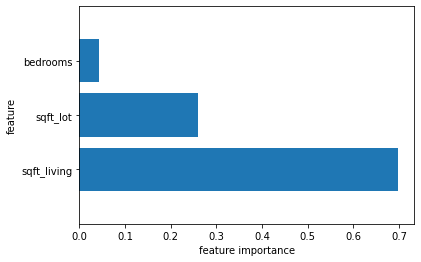

In [20]:
feature_names = sel
n_features = X.shape[1]
plot_feature_important_up(model, n_features, feature_names)

### 5개 모델 만들기

In [21]:
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, random_state=42)
model_5 = RandomForestRegressor(n_estimators=5, random_state=2)  # 5개의 트리 
model_5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=2)

In [22]:
model_5

RandomForestRegressor(n_estimators=5, random_state=2)

In [23]:
print( model_5.score(X_train, y_train))
print( model_5.score(X_test, y_test))

0.8922137121180739
0.37937640288308927


In [24]:
n_features = X.shape[1]

### 5개의 모델에 대한 정확도 평가

In [28]:
for model in model_5.estimators_:
    model.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.074
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.056
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.087
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.059
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.069


### 100개 모델 만들기

In [25]:
%%time
model_100 = RandomForestRegressor(n_estimators=100, random_state=2)  # 100개의 트리 
model_100.fit(X_train, y_train)
print( model_100.score(X_train, y_train))
print( model_100.score(X_test, y_test))

0.9341193749716377
0.45105945624970734
Wall time: 9.01 s


In [26]:
n_features = X_train.shape[1]
n_features

3

### 100개 모델에 대한 정확도 평가

In [27]:
cnt = 1
for model in model_100.estimators_:
    model.fit(X_train, y_train)
    if cnt % 10 == 0:
        print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
        print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    cnt += + 1

훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.039
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.071
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.090
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.050
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.044
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.092
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.066
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.074
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.058
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.061


## feature 변형하면서 정확도 평가하기

In [30]:
sel = ['id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = X_all[sel]
y = train['price']
nor_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
print("정규화 : ", nor_X.shape, y.shape)

정규화 :  (15035, 19) (15035,)


In [31]:
#정규화 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, 
                                                    random_state=42)
# 정규화 데이터 사용 안함.
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    random_state=42)

In [36]:
model = RandomForestRegressor(n_estimators=5, random_state=2, n_jobs=-1) #랜덤 포레스트는 n_jobs를 이용하여 여러개의 코어를 이용하여 병렬 처리를 통해 속도 향상을 시킬 수 있다.

model.fit(X_train, y_train)


print( model.score(X_train, y_train))
print( model.score(X_test, y_test))

0.9661368078686513
0.7893142782167984


### 실습 4-2 feature를 하나 생성하여, 다시 모델을 전후의 개선 score를 확인해 보자

In [44]:
train.corr()['price']  #price와 관련된 상관계수를 보겠다. 

id               0.020899
price            1.000000
bedrooms         0.323672
bathrooms        0.525479
sqft_living      0.702899
sqft_lot         0.096793
floors           0.262588
waterfront       0.265738
view             0.400806
condition        0.039740
grade            0.667211
sqft_above       0.608577
sqft_basement    0.322218
yr_built         0.047290
yr_renovated     0.140808
zipcode         -0.051498
lat              0.301604
long             0.023547
sqft_living15    0.586419
sqft_lot15       0.086384
Name: price, dtype: float64

In [39]:
#박성준님 코드
X_all['Rooms']=X_all['bedrooms']+X_all['bathrooms']
X_all=X_all.drop(['bedrooms','bathrooms'], axis=1) #조금하락! 0.9643 & 0.7992

In [45]:
#박성준님 코드
X_all['Rooms']=X_all['grade']+X_all['waterfront']
from sklearn.preprocessing import MinMaxScaler


In [46]:
sel = [ 'Rooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'NewScore', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
X = X_all[sel]
y = train['price']
nor_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
print("정규화 : ", nor_X.shape, y.shape)

KeyError: "['NewScore'] not in index"